# Health Insurance Project: Data Visualisation and Investigation
---

Import libraries:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import plotly.express as px

---

## Import cleaned data csv

Import the cleaned data that was the outut of the data_cleanup notebook

Also need to reapply the category data types and num columns as the csv doesn't store this data

Finally view the dataframe as a refresher of what we are dealing with

In [2]:
# Import cleaned data csv
insurance = pd.read_csv('../data/insurance_cleaned.csv')

# List of categorical columns to convert back to category dtype
categorical_columns = ['Age_Group', 'Sex', 'BMI_Group', 'Plan', 'Smoker', 'Region']

# Convert specified columns to category dtype
for col in categorical_columns:
    insurance[col] = insurance[col].astype('category')

# Reset numerical versions of the categorical columns in case changed
for col in categorical_columns:
    insurance[f"{col}_num"] = insurance[col].cat.codes

insurance.head()

,Age,Age_Group,Age_Group_num,Sex,Sex_num,BMI,BMI_Group,BMI_Group_num,Children,Plan,Plan_num,Smoker,Smoker_num,Region,Region_num,Charges,Charges_Per_Person,Charges_Outlier,Charges_Per_Person_Outlier
0,19,Ages 18-25,0,Female,0,27.900,Overweight,2,0,Standard,1,Yes,1,Southwest,3,16884.92400,16884.92400,False,False
1,18,Ages 18-25,0,Male,1,33.770,Obese,1,1,Family,0,No,0,Southeast,2,1725.55230,862.77615,False,False
2,28,Ages 26-34,1,Male,1,33.000,Obese,1,3,Family,0,No,0,Southeast,2,4449.46200,1112.36550,False,False
3,33,Ages 26-34,1,Male,1,22.705,Healthy Weight,0,0,Standard,1,No,0,Northwest,1,21984.47061,21984.47061,False,False
4,32,Ages 26-34,1,Male,1,28.880,Overweight,2,0,Standard,1,No,0,Northwest,1,3866.85520,3866.85520,False,False


---

## Data Frequency

Looking at the frequency lets you visualise distribution of data in each category.

#### Create bar charts to look at the frequency age group and bmi group data:

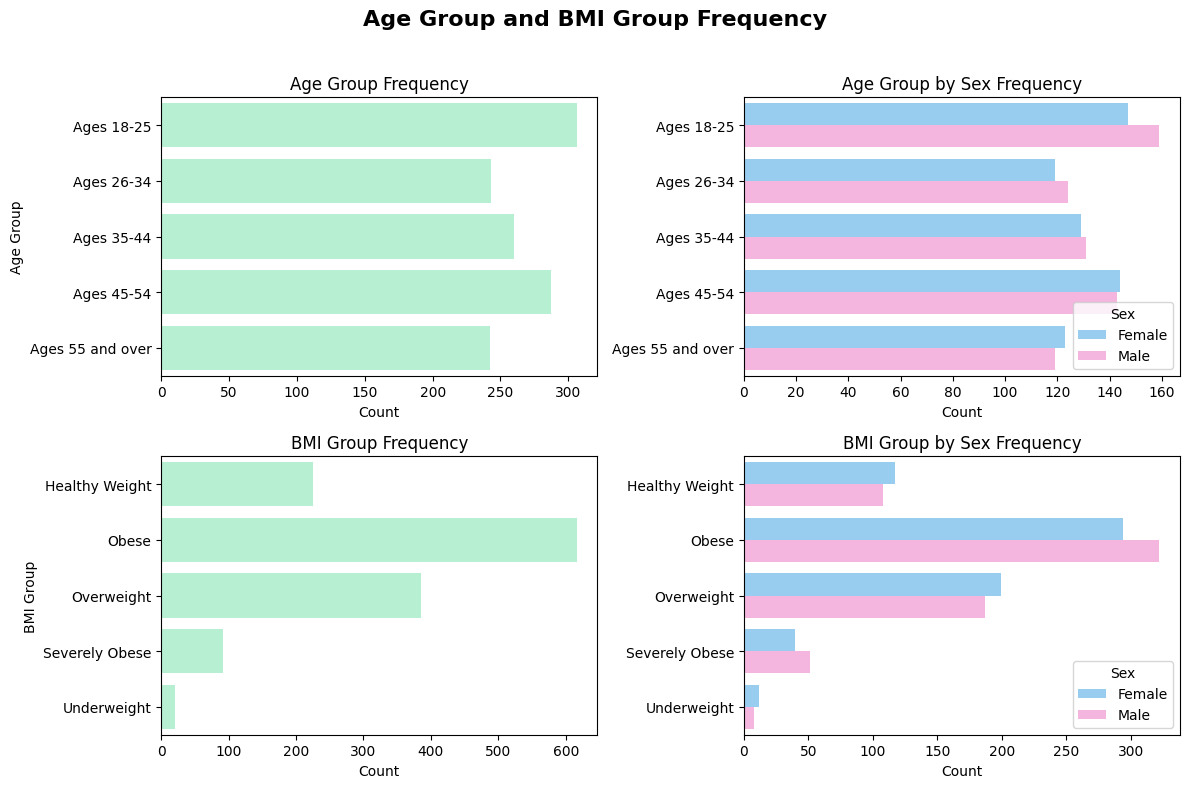

In [3]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Define palettes for male and female
palette_sex = ["#8AD0FF", "#FFAAE3"]

# Top-left: Age group
sns.countplot(y='Age_Group', data=insurance, ax=axs[0, 0], color='#AEF8D2')
axs[0, 0].set_title('Age Group Frequency')
axs[0, 0].set_xlabel('Count')
axs[0, 0].set_ylabel('Age Group')

# Top-right: Age group by sex
sns.countplot(y='Age_Group', data=insurance, hue='Sex', ax=axs[0, 1], palette=palette_sex)
axs[0, 1].set_title('Age Group by Sex Frequency')
axs[0, 1].set_xlabel('Count')
axs[0, 1].set_ylabel('')
axs[0, 1].legend(title='Sex', loc='lower right')

# Bottom-left: BMI group
sns.countplot(y='BMI_Group', data=insurance, ax=axs[1, 0], color="#AEF8D2")
axs[1, 0].set_title('BMI Group Frequency')
axs[1, 0].set_xlabel('Count')
axs[1, 0].set_ylabel('BMI Group')

# Bottom-right: BMI group by sex
sns.countplot(y='BMI_Group', data=insurance, hue='Sex', ax=axs[1, 1], palette=palette_sex)
axs[1, 1].set_title('BMI Group by Sex Frequency')
axs[1, 1].set_xlabel('Count')
axs[1, 1].set_ylabel('')
axs[1, 1].legend(title='Sex', loc='lower right')

# Add overall title
fig.suptitle('Age Group and BMI Group Frequency', fontsize=16, fontweight='bold')

# Adjust spacing for suptitle
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Save figure and show
plt.savefig('../charts/age_and_bmi_frequency.png')
plt.show()

In the charts above,

The age group distribution is fairly even with similar frequency of data across all the age groups. The split of male and female in age groups is also fairly even.

The BMI group has a lot more data obese and overweight people, with hardly any underweight people. Again the male and female split in each category is similar.

<br/>

#### Create pie charts to look at the proportional distribution of plan, smoker, region and sex

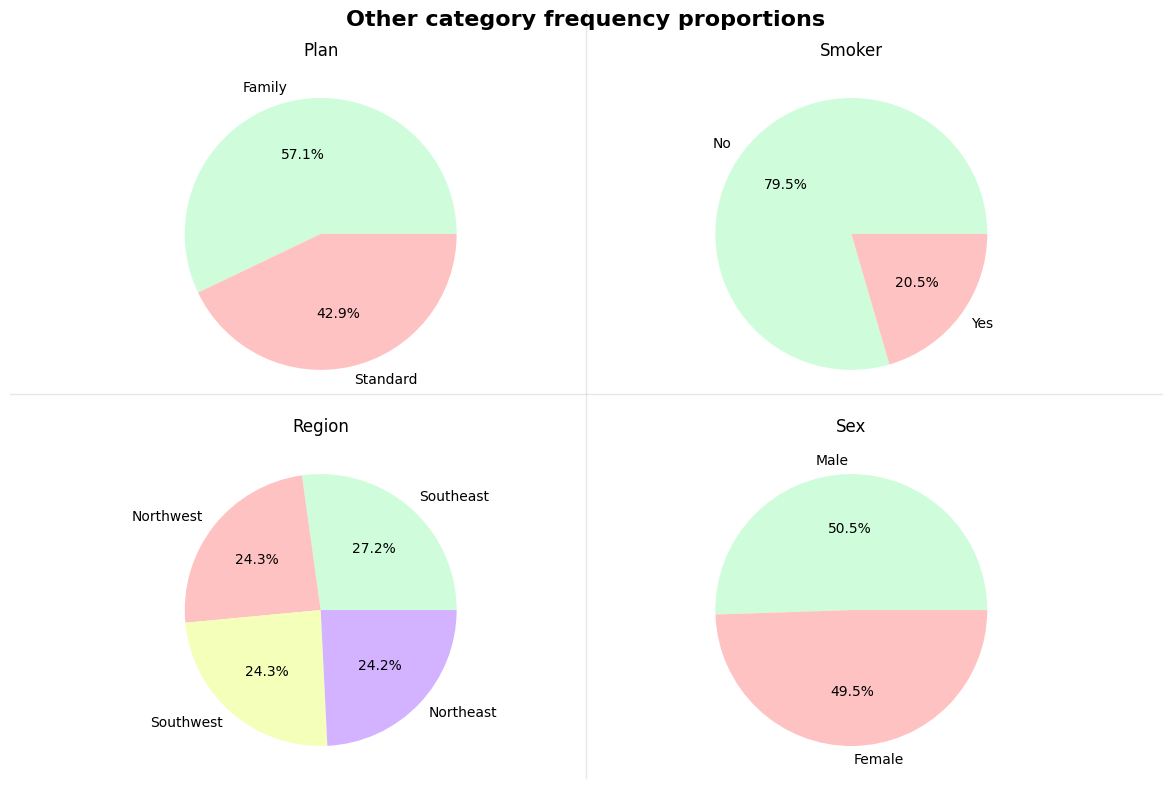

In [ ]:
# Get value counts for each category
plan_counts = insurance['Plan'].value_counts(normalize=True)
smoker_counts = insurance['Smoker'].value_counts(normalize=True)
region_counts = insurance['Region'].value_counts(normalize=True)
sex_counts = insurance['Sex'].value_counts(normalize=True)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Top-left: Plan
axs[0, 0].pie(plan_counts.values, labels=plan_counts.index, autopct='%1.1f%%', colors=["#CFFDDB","#FFC2C2"])
axs[0, 0].set_title('Plan')

# Top-right: Smoker
axs[0, 1].pie(smoker_counts.values, labels=smoker_counts.index, autopct='%1.1f%%', colors=["#CFFDDB","#FFC2C2"])
axs[0, 1].set_title('Smoker')

# Bottom-left: Region
axs[1, 0].pie(region_counts.values, labels=region_counts.index, autopct='%1.1f%%', colors=["#CFFDDB","#FFC2C2","#F4FFBA","#D3B2FF"])
axs[1, 0].set_title('Region')

# Bottom-right: Sex
axs[1, 1].pie(sex_counts.values, labels=sex_counts.index, autopct='%1.1f%%', colors=["#CFFDDB","#FFC2C2"])
axs[1, 1].set_title('Sex')

# Add overall title
fig.suptitle('Other category frequency proportions', fontsize=16, fontweight='bold')

# Adjust spacing for suptitle
plt.tight_layout( pad=1.0)

# Add grid lines to separate the pie charts
fig.add_artist(mlines.Line2D([0.02, 0.98], [0.5, 0.5], color='lightgrey', linewidth=1, alpha=0.5, transform=fig.transFigure))
fig.add_artist(mlines.Line2D([0.5, 0.5], [0.02, 0.98], color='lightgrey', linewidth=1, alpha=0.5, transform=fig.transFigure))

# Save figure and show
#plt.savefig('../charts/age_and_bmi_frequency.png')
plt.show()

In the charts above you can see there is a fairly even split between all regions and sex for the data collected, there are a few more on the family plan and a lot more non-smoker data recorded than smoker.